In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80

## Load data

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [4]:
species_maping = dict(zip(range(3), iris.target_names))
species_maping

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [5]:
y_names = np.vectorize(species_maping.get)(y)

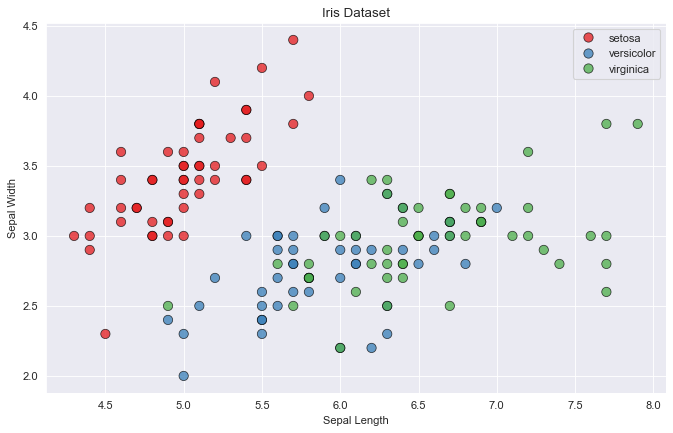

In [6]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y_names,
    s=70,
    palette='Set1',
    edgecolor='black',
    alpha=0.75
)

plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

## Create a KNN classifier

### Calculate distance between two points

In [7]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [8]:
point_one = np.array([1, 1, 1])
point_two = np.array([2, 2, 2])

distance(point_one, point_two)

1.7320508075688772

### Classify a points based on its neighbors

In [9]:
def classify(X, y, test_point, k=5):
    distances = []
    for i, x in enumerate(X):
        distances.append([distance(x, test_point), y[i]])
    sorted_distances = sorted(distances)
    top_k = sorted_distances[:k]
    labels = np.array(top_k)[:, 1]
    return np.argmax(np.bincount(labels.astype('int')))

### Calculate accuracy of the classifier

In [10]:
def accuracy(X, y, k=5):
    predictions = []
    for i, x in enumerate(X):
        predictions.append(classify(X, y, x, k))
    return np.sum(predictions == y) / len(y)

### Test the classifier

In [11]:
K = 5
test_point = np.array([5.8, 3.0])
test_point_class = classify(X, y, test_point, K)
print(f'Predicted class for test point {test_point} is {species_maping[test_point_class]}')

Predicted class for test point [5.8 3. ] is versicolor


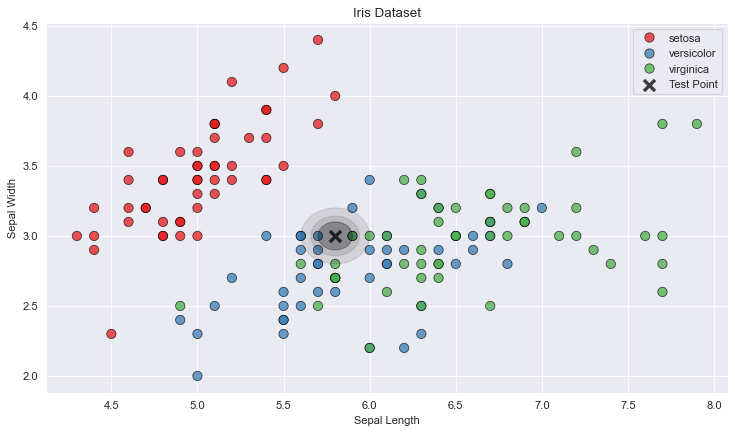

In [12]:
plt.figure(figsize=(11, 6))

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y_names,
    s=70,
    palette='Set1',
    edgecolor='black',
    alpha=0.75
)

plt.scatter(test_point[0], test_point[1], marker='x', s=100, color='black', linewidth=3, alpha=0.75, label='Test Point')

# dibujar circulo alrededor del punto de prueba para visualizar los k vecinos más cercanos al punto de prueba 
distances = []
for i, x in enumerate(X):
    distances.append([distance(x, test_point), y[i]])

sorted_distances = sorted(distances)
top_k = sorted_distances[:K]

for d in top_k:
    circle = plt.Circle((test_point[0], test_point[1]), d[0], color='k', alpha=0.1)
    plt.gca().add_patch(circle)

plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

## Separate training and test data

In [13]:
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

split = 0.8
split_idx = int(split * len(X))

X_train = X[:split_idx]
y_train = y[:split_idx]

X_test = X[split_idx:]
y_test = y[split_idx:]

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (120, 2)
y_train shape: (120,)
X_test shape: (30, 2)
y_test shape: (30,)


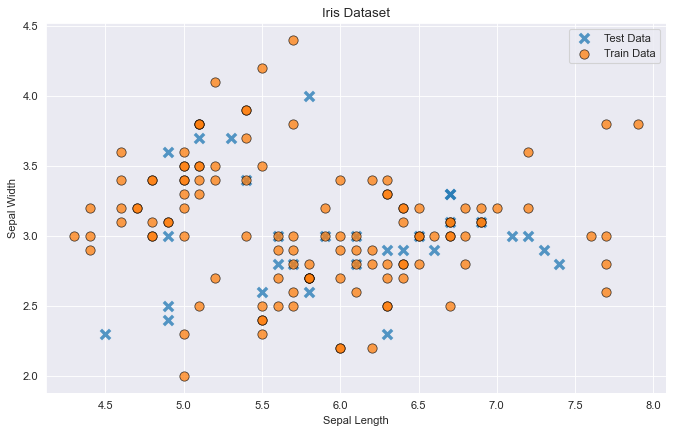

In [14]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    s=70,
    palette='Set1',
    edgecolor='black',
    alpha=0.75,
    label='Test Data',
    marker='x',
    linewidth=3,
)

sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    s=70,
    palette='Set1',
    edgecolor='black',
    alpha=0.75,
    label='Train Data',
    marker='o'
)


plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

## Predicting the test set results and calculating the accuracy

In [15]:
y_pred = []

for test_point in X_test:
    y_pred.append(classify(X_train, y_train, test_point, K))

y_pred = np.array(y_pred)

print(f'Accuracy: {accuracy(X_test, y_test, K)}')

Accuracy: 0.7666666666666667


<Axes: xlabel='Predicted Species', ylabel='Actual Species'>

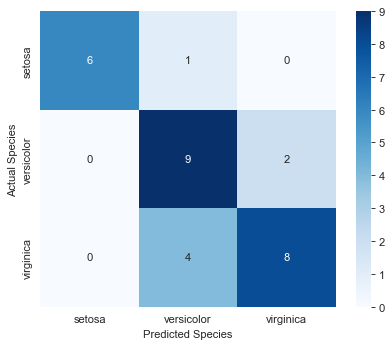

In [16]:
sns.heatmap(
    pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']),
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
    square=True
)

## Testing class file 

In [17]:
from knn import KnnClassifier

knn = KnnClassifier(k=5)

knn.fit(X_train, y_train)

In [18]:
y_pred = knn.predict(X_test)

print(f'Accuracy: {knn.accuracy(X_test, y_test)}')

Accuracy: 0.36666666666666664
